In [20]:
import numpy as np
import pandas as pd
import os
import datetime
from matplotlib import pyplot as plt

In [21]:
def read_txt(filename):
    save_ls = []
    with open(filename, 'r') as file:
        for line in file:
            line = line.split(',')
            for val in line:
                save_ls.append(val)
    return save_ls

# read in sensor data
p1 = read_txt('../collection1/CS109a_pressure.txt')
p2 = read_txt('../collection2/CS109a_pressure.txt')
p3 = read_txt('../collection3/CS109a_pressure.txt')
p4 = read_txt('../collection4/CS109a_pressure.txt')
p5 = read_txt('../collection5/CS109a_pressure.txt')
p6 = read_txt('../collection6/CS109a_pressure.txt')
p7 = read_txt('../collection7/CS109a_pressure.txt')
p8 = read_txt('../collection8/CS109a_pressure.txt')
p9 = read_txt('../collection9/CS109a_pressure.txt')

In [22]:
# generate start times (every 30 minutes) from initial start dates
oct23 = datetime.datetime(2019, 10, 23, hour=8, minute=16)
oct29 = datetime.datetime(2019, 10, 29, hour=22, minute=42)
nov3 = datetime.datetime(2019, 11, 3, hour=9, minute=30)
nov6 = datetime.datetime(2019, 11, 6, hour=21, minute=13)
nov11 = datetime.datetime(2019, 11, 11, hour=12, minute=50)
nov16 = datetime.datetime(2019, 11, 16, hour=9, minute=0) # temp, press, hum every 15 min
nov21 = datetime.datetime(2019, 11, 21, hour=8, minute=53)
nov26 = datetime.datetime(2019, 11, 26, hour=13, minute=7)
dec2 = datetime.datetime(2019, 12, 2, hour=8, minute=35)

def compute_time_int(start_dt, pressure,m=30):
    dates = [start_dt]
    for i in range(len(pressure)-1): 
        dates.append(dates[i] + datetime.timedelta(minutes=m))
    df = pd.DataFrame({'date': dates,'pressure': pressure})
    df.drop(df.tail(1).index,inplace=True)
    return df
    

df0 = compute_time_int(oct23, p1)
df1 = compute_time_int(oct29, p2)
df2 = compute_time_int(nov3, p3)
df3 = compute_time_int(nov6, p4)
df4 = compute_time_int(nov11, p5)
df5 = compute_time_int(nov16, p6,15)
df6 = compute_time_int(nov21, p7)
df7 = compute_time_int(nov26, p8)
df8 = compute_time_int(dec2, p9)
# drop last empty row

In [23]:
def convert_to_float(dfs):
    for df in dfs:
        df.pressure = [float(i) for i in df.pressure]

def fill_in_dates(start_dt, end_dt):
    in_between = []
    cur_dt = start_dt
    in_between.append(cur_dt)
    while cur_dt <= end_dt:
        cur_dt += datetime.timedelta(minutes=5)
        in_between.append(cur_dt)
    return in_between

def create_large_df(dfs, ls=None, fill_in=False):
    if fill_in:
        b0 = fill_in_dates(max(df0.date), min(df1.date))
        b1 = fill_in_dates(max(df1.date), min(df2.date))
        b2 = fill_in_dates(max(df2.date), min(df3.date))
        b3 = fill_in_dates(max(df3.date), min(df4.date))

        df11 = pd.DataFrame({'date': b1, 'pressure': float(l2[-2])*np.ones(len(b1))})
        df21 = pd.DataFrame({'date': b2, 'pressure': float(l3[-2])*np.ones(len(b2))})
        df31 = pd.DataFrame({'date': b3, 'pressure': float(l4[-2])*np.ones(len(b3))})

        df = pd.concat(dfs, axis=0)
    else:
        df = pd.concat(dfs, axis=0)
    return df

def assign_numerical_date_vals(df):
    df2 = df.copy()
    
    month = []
    day = []
    hour = []
    minute = []
    weekday = []
    
    for i,dt in enumerate(df2['date']):
        month.append(dt.month)
        day.append(dt.day)
        hour.append(dt.hour)
        minute.append(dt.minute)
        weekday.append(dt.weekday())
    
    df2['month'] = month
    df2['day'] = day
    df2['hour'] = hour
    df2['minute'] = minute
    df2['weekday'] = weekday
    return df2

def get_day_labels(df):
    days = df['day']
    unique_days =list(np.unique(days))
    indexes = np.unique(days, return_index=True)[1]
    dates_in_order = [days.values[index] for index in sorted(indexes)]
    return dates_in_order

def calendar_plot(df, dates_in_order, feature):
    fig, ax = plt.subplots(6,6, figsize=(18,15), sharey=True)
    ax = ax.flatten()

    for i,d in enumerate(dates_in_order):
        temp = df[df['day'] == d]
        ax[i].scatter(temp['hour'], temp[feature])
        ax[i].set_title("Day {}".format(d))
    plt.suptitle(feature)
    plt.xlabel("Hour")
    plt.ylabel(feature)
    plt.show()


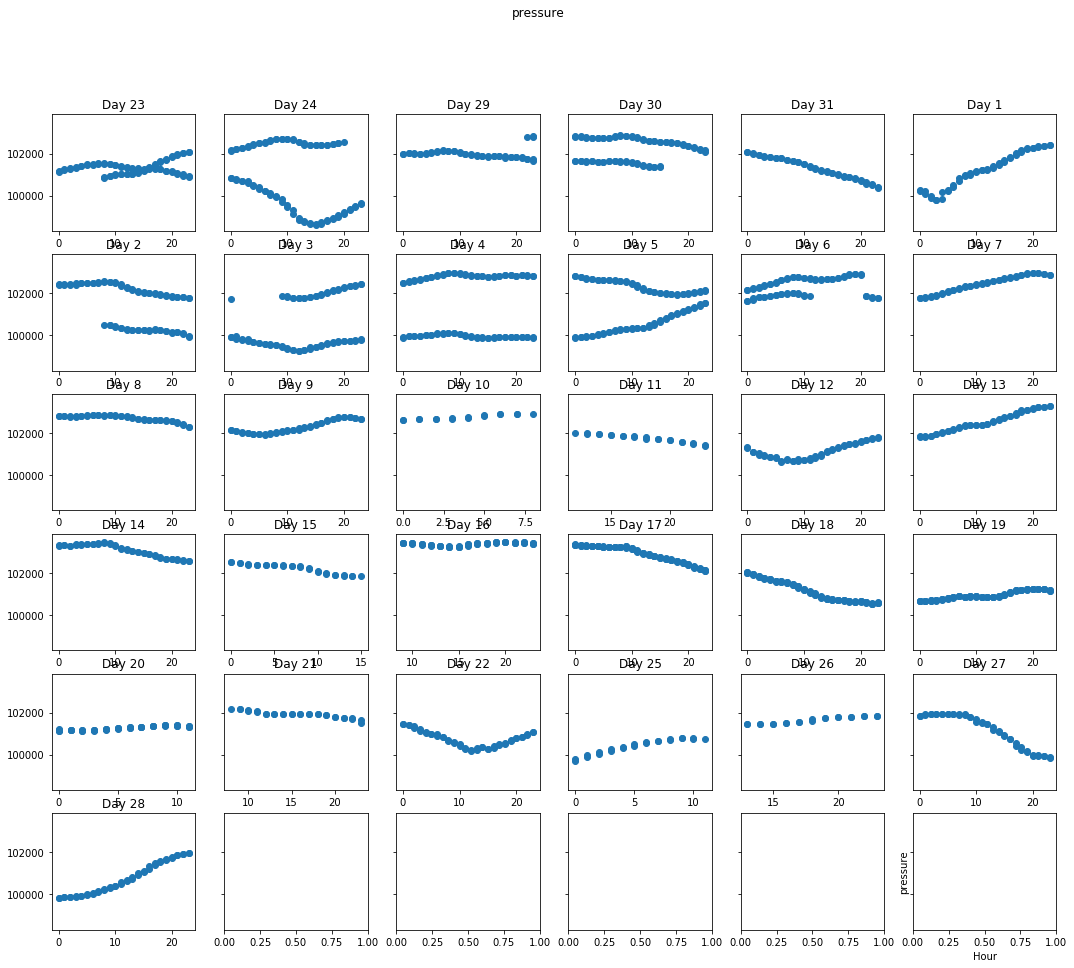

In [24]:
dfs = [df0,df1,df2,df3,df4, df5, df6, df7, df8]   

# convert light values to floats
convert_to_float(dfs)

# create large df from all collection samples
dfs_to_concat = [df0, df1, df2, df3, df4, df5, df6, df7, df8]
press = create_large_df(dfs_to_concat)  

# plot based on calendar day
press2 = assign_numerical_date_vals(press)
dates_in_order = get_day_labels(press2)
calendar_plot(press2, dates_in_order, 'pressure')

In [25]:
def ave_press(x):
    x['avg_hrly_press'] = np.mean(x['pressure'])
    return x

press2 = press2.reset_index()
del press2['index']

press3 = press2.groupby(['month','day', 'hour']).apply(ave_press)
press4 = press3.drop(columns=['date', 'minute', 'pressure'])
press5 = press4.drop_duplicates(subset=["month","day", 'hour'])

In [26]:
press5

month  day  hour  weekday  avg_hrly_press
0        10   23     8        2      100858.130
2        10   23     9        2      100921.880
4        10   23    10        2      101001.595
6        10   23    11        2      101024.130
8        10   23    12        2      101025.725
...     ...  ...   ...      ...             ...
1782     12    6     7        4      101990.020
1784     12    6     8        4      102007.570
1786     12    6     9        4      101986.890
1788     12    6    10        4      101894.715
1790     12    6    11        4      101877.170

[802 rows x 5 columns]

In [27]:
press5.to_csv("pressure_df.csv")